#Libraries

In [1]:
import pandas as pd
import numpy as np
from math import *
from scipy.special import lambertw
import matplotlib.pyplot as plt

In [2]:
!pip install GitPython

In [3]:
from git import Repo
!git clone https://github.com/MariiaKalinina/BM.git

Cloning into 'BM'...
remote: Enumerating objects: 1054, done.
remote: Counting objects: 100% (423/423), done.
remote: Compressing objects: 100% (197/197), done.
remote: Total 1054 (delta 319), reused 226 (delta 226), pack-reused 631 (from 1)
Receiving objects: 100% (1054/1054), 112.54 MiB | 17.63 MiB/s, done.
Resolving deltas: 100% (580/580), done.
Updating files: 100% (172/172), done.


### Data preparation

In [4]:
# Test Data-1
df_constast = pd.read_csv('/content/BM/Initial data/Constants.csv', delimiter=';', header=0)
df_well = pd.read_csv('/content/BM/Initial data/Well_parametrs_test1.csv', delimiter=';', header=0)
df_well[['Depth top, m', 'Depth bottom, m']] = df_well[['Depth top, m', 'Depth bottom, m']].apply(lambda x: x / 1000)

In [5]:
df_well

,Well,Event_name,Event_type,Lithology_type,Age (Ma),"Depth top, m","Depth bottom, m","Thickness, m","D Thickness (erosion), m","Paleobathymetry, Ma","Sea level, m",Sublayers,N sublayers,PSE,Kinetic,"TOC initial, %","HI initial, %"
0,Test_well,Erosion,Erosion,NaN,0,0.00,0.00,0,NaN,300,0,NaN,NaN,NaN,NaN,NaN,NaN
1,Test_well,Layer 10,Erosion,Shales,0,0.00,0.20,200,NaN,300,0,On,0.0,NaN,NaN,NaN,NaN
2,Test_well,Layer 9,Deposition,Sandstones,45,0.20,0.45,250,NaN,325,40,On,0.0,NaN,NaN,NaN,NaN
3,Test_well,Layer 8,Deposition,Shales,55,0.45,1.20,750,NaN,350,50,On,0.0,NaN,NaN,NaN,NaN
4,Test_well,Layer 7,Deposition,Chalk,80,1.20,2.50,1300,NaN,300,100,On,0.0,NaN,NaN,NaN,NaN
5,Test_well,Layer 6,Deposition,Sandstones,100,2.50,3.40,900,NaN,200,80,On,0.0,NaN,NaN,NaN,NaN
6,Test_well,Layer 5,Deposition,Limestones,125,3.40,3.60,200,NaN,20,70,On,0.0,Source Rock,Tegelaar(1994)_TI-S(Spain),10.0,100.0
7,Test_well,Layer 4,Deposition,Dolomite,145,3.60,4.00,400,NaN,20,-40,On,0.0,NaN,NaN,NaN,NaN
8,Test_well,Layer 3,Deposition,Sandstones,160,4.00,4.25,250,NaN,10,-20,On,0.0,NaN,NaN,NaN,NaN
9,Test_well,Layer 2,Deposition,Anhydrite,210,4.25,5.00,750,NaN,20,0,On,0.0,NaN,NaN,NaN,NaN


### DataBase

In [7]:
import pandas as pd

file_path = '/content/BM/Initial data/Literature database from PM for all rock lithotypes.xlsx'

database = pd.ExcelFile(file_path)
print("Available sheets:", database.sheet_names)

for sheet_name in database.sheet_names:
    clean_name = sheet_name.replace(" ", "_").replace("-", "_")
    var_name = f"Database_{clean_name}"

    # Assign the DataFrame to a dynamically named variable
    globals()[var_name] = pd.read_excel(
        file_path,
        sheet_name=sheet_name,
        header=0
    )
    print(f"Created variable: {var_name}")

Available sheets: ['Lithotypes', 'Kinetics all', 'Secondary cracking', 'Geochronology', 'SWIT_Map', 'SWIT_coordinates ', 'Global eustatic curve']
Created variable: Database_Lithotypes
Created variable: Database_Kinetics_all
Created variable: Database_Secondary_cracking
Created variable: Database_Geochronology
Created variable: Database_SWIT_Map
Created variable: Database_SWIT_coordinates_
Created variable: Database_Global_eustatic_curve


#### Lithology

In [9]:
from pandas.api.types import is_scalar

Database_Lithotypes.columns = Database_Lithotypes.iloc[0]
Database_Lithotypes = Database_Lithotypes.drop([0, 1]).reset_index(drop=True)

current_columns = Database_Lithotypes.columns
if is_scalar(current_columns[0]) and pd.isna(current_columns[0]):
    new_columns = list(current_columns)
    new_columns[0] = "Lithology type"
    Database_Lithotypes.columns = new_columns

Database_Lithotypes.head(3)

,Sandstone (typical),2720,41,1,Athy's law (depth),27.47,1.15,26.6,41.56,17.81,...,23.2,0.0,0,0,0,0,0,0,0,NaN
0,Sandstone (clay poor),2700,42,1,Athy's law (depth),28.05,1.18,26.27,40.47,17.34,...,23.2,0.0,0,0,0,0,0,0,0,NaN
1,"Sandstone (quartzite, typical)",2640,42,1,Athy's law (depth),29.1,1.22,27.26,42.81,17.81,...,23.2,0.0,0,0,0,0,0,0,0,NaN
2,"Sandstone (quartzite, very quartz rich)",2640,42,1,Athy's law (depth),25.26,1.18,24.61,16.15,39.77,...,23.2,0.0,0,0,0,0,0,0,0,NaN


Check name of lithology to name in Database_Lithotypes

In [10]:
df_well["Lithology_type"] = df_well["Lithology_type"].replace({
    "Sandstones": "Sandstone (typical)",
    "Shales": "Shale (typical)",
    "Limestones": "Limestone (organic rich - typical)",
    "Dolomite": "Dolomite (typical)",
    "Chalk": "Chalk (typical)",
    "Anhydrite": "Anhydrite",
    "Quartzite": "Quartzite"
})

In [11]:
df_well

,Well,Event_name,Event_type,Lithology_type,Age (Ma),"Depth top, m","Depth bottom, m","Thickness, m","D Thickness (erosion), m","Paleobathymetry, Ma","Sea level, m",Sublayers,N sublayers,PSE,Kinetic,"TOC initial, %","HI initial, %"
0,Test_well,Erosion,Erosion,NaN,0,0.00,0.00,0,NaN,300,0,NaN,NaN,NaN,NaN,NaN,NaN
1,Test_well,Layer 10,Erosion,Shale (typical),0,0.00,0.20,200,NaN,300,0,On,0.0,NaN,NaN,NaN,NaN
2,Test_well,Layer 9,Deposition,Sandstone (typical),45,0.20,0.45,250,NaN,325,40,On,0.0,NaN,NaN,NaN,NaN
3,Test_well,Layer 8,Deposition,Shale (typical),55,0.45,1.20,750,NaN,350,50,On,0.0,NaN,NaN,NaN,NaN
4,Test_well,Layer 7,Deposition,Chalk (typical),80,1.20,2.50,1300,NaN,300,100,On,0.0,NaN,NaN,NaN,NaN
5,Test_well,Layer 6,Deposition,Sandstone (typical),100,2.50,3.40,900,NaN,200,80,On,0.0,NaN,NaN,NaN,NaN
6,Test_well,Layer 5,Deposition,Limestone (organic rich - typical),125,3.40,3.60,200,NaN,20,70,On,0.0,Source Rock,Tegelaar(1994)_TI-S(Spain),10.0,100.0
7,Test_well,Layer 4,Deposition,Dolomite (typical),145,3.60,4.00,400,NaN,20,-40,On,0.0,NaN,NaN,NaN,NaN
8,Test_well,Layer 3,Deposition,Sandstone (typical),160,4.00,4.25,250,NaN,10,-20,On,0.0,NaN,NaN,NaN,NaN
9,Test_well,Layer 2,Deposition,Anhydrite,210,4.25,5.00,750,NaN,20,0,On,0.0,NaN,NaN,NaN,NaN


# Layers Subdivision

In [13]:
layers_quantity = len(df_well[1:df_well.shape[0]-1]) #amount of layers for calculation

In [15]:
work_layers = df_well[1:df_well.shape[0]] ### Слои, по которым идет расчет
work_layers_initial = work_layers.copy()
# work_layers_initial

In [16]:
work_layers['Sublayers'] = 'On'
work_layers['N sublayers'] = int(1)

<ipython-input-16-369a6a0a979c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  work_layers['Sublayers'] = 'On'
<ipython-input-16-369a6a0a979c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  work_layers['N sublayers'] = int(1)


In [22]:
def layers_subdivision(work_layers, on=True):

  df_repeated = pd.DataFrame()

  if on == False:
    return work_layers

  else:

    result_df = pd.DataFrame()
    work_layers_copy = work_layers[0:].copy()

    for index, row in work_layers_copy.iterrows():
        if not pd.isnull(row['N sublayers']):
            # Calculate the interval value
            # print(row['Depth bottom, m'], row['Depth top, m'], int(row['N sublayers']))
            interval = (row['Depth bottom, m'] - row['Depth top, m']) / int(row['N sublayers'])
            interval_thickness = row['Thickness, m'] / (int(row['N sublayers']))

            interval_age = 0
            next_index = index + 1
            if next_index < len(work_layers_copy):
              next_row = work_layers_copy.loc[next_index]
              interval_age = (next_row['Age (Ma)'] - row['Age (Ma)']) / (int(row['N sublayers']))
            else:
              last_row= df_well.iloc[-1]
              next_row = last_row
              interval_age = (next_row['Age (Ma)'] - row['Age (Ma)']) / (int(row['N sublayers']))

            # Repeat the row 'div' times and append to the new DataFrame
            repeated_rows = [row.copy() for _ in range(int(row['N sublayers']))]
            for i, r in enumerate(repeated_rows):
                r['Event_name'] = row['Event_name'] + f'_{i+1}'
                r['Depth top, m'] = row['Depth top, m'] + i * interval
                r['Depth bottom, m'] = row['Depth top, m'] + (i + 1) * interval
                r['Thickness, m'] = interval_thickness
                r['Age (Ma)'] = row['Age (Ma)'] + i*interval_age
            df_repeated = pd.concat([df_repeated, pd.DataFrame(repeated_rows)], ignore_index=True)
        else:
            df_repeated = pd.concat([df_repeated, pd.DataFrame([row])], ignore_index=True)

    return df_repeated

In [23]:
work_layers = layers_subdivision(work_layers, on=True)

In [24]:
work_layers_copy_initial = work_layers.copy()

### Lithology

In [25]:
lithology_numbers = {30000: {'lith':'Sandstone (typical)', 'lith_num':1, 'hatch': '..', 'color':'#ffff00'},
                 65030: {'lith':'Sandstone (typical)', 'lith_num':2, 'hatch':'-.', 'color':'#ffe119'},
                 65000: {'lith':'Shale (typical)', 'lith_num':3, 'hatch':'-.. ', 'color':'#bebebe'},
                 80000: {'lith':'Marl', 'lith_num':4, 'hatch':'', 'color':'#7cfc00'},
                 74000: {'lith':'Dolomite (typical)', 'lith_num':5, 'hatch':'-\\', 'color':'blue'},
                 70000: {'lith':'Limestone (organic rich - typical)', 'lith_num':6, 'hatch':'+', 'color':'#80ffff'},
                 70032: {'lith':'Chalk (typical)', 'lith_num':7, 'hatch':'..', 'color':'#80ffff'},
                 88000: {'lith':'Halite', 'lith_num':8, 'hatch':'x', 'color':'#7ddfbe'},
                 86000: {'lith':'Anhydrite', 'lith_num':9, 'hatch':'-/', 'color':'#ff80ff'},
                 99000: {'lith':'Tuff', 'lith_num':10, 'hatch':'||', 'color':'#ff8c00'},
                 90000: {'lith':'Quartzite', 'lith_num':11, 'hatch':'oo', 'color':'#ffe119'},
                 93000: {'lith':'nan', 'lith_num':12, 'hatch':'-|', 'color':'#ef138a'}}

In [26]:
df_lith = pd.DataFrame.from_dict(lithology_numbers, orient='index')
df_lith.reset_index(inplace=True)

df_lith

,index,lith,lith_num,hatch,color
0,30000,Sandstone (typical),1,..,#ffff00
1,65030,Sandstone (typical),2,-.,#ffe119
2,65000,Shale (typical),3,-..,#bebebe
3,80000,Marl,4,,#7cfc00
4,74000,Dolomite (typical),5,-\,blue
5,70000,Limestone (organic rich - typical),6,+,#80ffff
6,70032,Chalk (typical),7,..,#80ffff
7,88000,Halite,8,x,#7ddfbe
8,86000,Anhydrite,9,-/,#ff80ff
9,99000,Tuff,10,||,#ff8c00


In [27]:
lithology_array = []
hatch_array = []
color_array = []

for row_index, row in enumerate(work_layers.itertuples()):

    lithology = work_layers.at[row.Index, 'Lithology_type']
    layers_name = work_layers.at[row.Index, 'Event_name']
    # print(lithology)

    lit_num = df_lith.loc[df_lith['lith'] == str(lithology), 'index'].iloc[0]
    lithology_array.append(lit_num)


    hatch_val = df_lith.loc[df_lith['lith'] == str(lithology), 'hatch'].iloc[0]
    hatch_array.append(hatch_val)

    color_val = df_lith.loc[df_lith['lith'] == str(lithology), 'color'].iloc[0]
    color_array.append(color_val)

work_layers_initial["Lithology"] = lithology_array
work_layers_initial["Index"] = hatch_array
work_layers_initial["Color"] = color_array
work_layers_initial # для построения графиков с литологией

,Well,Event_name,Event_type,Lithology_type,Age (Ma),"Depth top, m","Depth bottom, m","Thickness, m","D Thickness (erosion), m","Paleobathymetry, Ma","Sea level, m",Sublayers,N sublayers,PSE,Kinetic,"TOC initial, %","HI initial, %",Lithology,Index,Color
1,Test_well,Layer 10,Erosion,Shale (typical),0,0.00,0.20,200,NaN,300,0,On,0.0,NaN,NaN,NaN,NaN,65000,-..,#bebebe
2,Test_well,Layer 9,Deposition,Sandstone (typical),45,0.20,0.45,250,NaN,325,40,On,0.0,NaN,NaN,NaN,NaN,30000,..,#ffff00
3,Test_well,Layer 8,Deposition,Shale (typical),55,0.45,1.20,750,NaN,350,50,On,0.0,NaN,NaN,NaN,NaN,65000,-..,#bebebe
4,Test_well,Layer 7,Deposition,Chalk (typical),80,1.20,2.50,1300,NaN,300,100,On,0.0,NaN,NaN,NaN,NaN,70032,..,#80ffff
5,Test_well,Layer 6,Deposition,Sandstone (typical),100,2.50,3.40,900,NaN,200,80,On,0.0,NaN,NaN,NaN,NaN,30000,..,#ffff00
6,Test_well,Layer 5,Deposition,Limestone (organic rich - typical),125,3.40,3.60,200,NaN,20,70,On,0.0,Source Rock,Tegelaar(1994)_TI-S(Spain),10.0,100.0,70000,+,#80ffff
7,Test_well,Layer 4,Deposition,Dolomite (typical),145,3.60,4.00,400,NaN,20,-40,On,0.0,NaN,NaN,NaN,NaN,74000,-\,blue
8,Test_well,Layer 3,Deposition,Sandstone (typical),160,4.00,4.25,250,NaN,10,-20,On,0.0,NaN,NaN,NaN,NaN,30000,..,#ffff00
9,Test_well,Layer 2,Deposition,Anhydrite,210,4.25,5.00,750,NaN,20,0,On,0.0,NaN,NaN,NaN,NaN,86000,-/,#ff80ff
10,Test_well,Layer 1,Deposition,Quartzite,245,5.00,5.40,400,NaN,0,0,On,0.0,NaN,NaN,NaN,NaN,90000,oo,#ffe119


In [29]:
lithology_array = []
hatch_array = []
color_array = []

for row_index, row in enumerate(work_layers_initial.itertuples()):

    lithology = work_layers_initial.at[row.Index, 'Lithology_type']
    layers_name = work_layers_initial.at[row.Index, 'Event_name']
    # print(lithology)

    lit_num = df_lith.loc[df_lith['lith'] == str(lithology), 'index'].iloc[0]
    lithology_array.append(lit_num)


    hatch_val = df_lith.loc[df_lith['lith'] == str(lithology), 'hatch'].iloc[0]
    hatch_array.append(hatch_val)

    color_val = df_lith.loc[df_lith['lith'] == str(lithology), 'color'].iloc[0]
    color_array.append(color_val)

work_layers["Lithology"] = lithology_array
work_layers["Index"] = hatch_array
work_layers["Color"] = color_array
work_layers_with_color = work_layers.copy()

## Decompacted Thickness, Porosity \& Permeability, Density, ...



In [30]:
import numpy as np
from scipy.special import lambertw

def decomp_func(y1, y2, y1_d, phi, c):  # возвращает фун-ию одной переменной, для которой затем подбирается параметр y2_d

    y2_d = (np.exp(-np.log(e) * y1_d * c) * phi * np.log(e) - \
            np.exp(-np.log(e) * y1 * c) * phi * np.log(e) + \
            np.exp(-np.log(e) * y2 * c) * phi * np.log(e) - \
            np.log(e) * y1 * c + np.log(e) * y1_d * c + np.log(e) * y2 * c + \
            lambertw(-np.log(e) * phi * np.exp(-np.exp(-np.log(e) * y1_d * c) * phi * np.log(e) +\
                                               np.exp(-np.log(e) * y1 * c) * phi * np.log(e) - \
                                               np.exp(-np.log(e) * y2 * c) * phi * np.log(e) + \
                                               np.log(e) * y1 * c - \
                                               np.log(e) * y1_d * c - np.log(e) * y2 * c))) / c / np.log(e)
    return y2_d.real

In [31]:
#считает скорректированную декомпактированную глубину
def corrected(depth, RoMantle, RoWater, sea_level, sea_level_today):
  return depth - sea_level_today * (RoWater / (RoMantle - RoWater)) + (sea_level - sea_level_today)

In [32]:
### the average porosity of a stratigraphic unit at any depth [A.58.6]
def porosity_func(surface_porosity, exp_decay, y1, y2, thicknesses):
  return surface_porosity/exp_decay*((np.exp(-exp_decay*y1) - np.exp(-exp_decay*y2))/thicknesses)

In [33]:
def bulk_density(porosity, RoGrain, RoWater):
  return porosity*RoWater + (1-porosity)*RoGrain

In [34]:
def bulk_density_column(porosity, RoGrain, RoWater):
  return porosity*RoWater + (1-porosity)*RoGrain

In [35]:
def tectonic_subsidence (RoMantle, RoWater, RoColumn, depth):
  return depth*((RoMantle-RoColumn)/(RoMantle-RoWater))

In [36]:
def Kozeny_Carman(r, phi, tau):
    return r**2 * phi / (8 * tau**2)

def Kozeny_Carman_lithology(phi, S, k):
    phi_corrected = phi - 3.1 * 10e-10
    if phi_corrected < 0.1:
        return 2 * 10**16 * k * (phi_corrected**5 / (S**2 * (1 - phi_corrected)**2))
    else:
        return 2 * 10**14 * k * (phi_corrected**3 / (S**2 * (1 - phi_corrected)**2))

In [37]:
def sedimentaiton_rate(depth, years):
  return depth / (age if age != 0 else 1e20)

In [38]:
def hydrostatic_pressures(depths, sea_level, sediment_surface, water_depth, rho_water=1040):

    """
    Calculate cumulative hydrostatic pressures for each layer.

    Parameters:
    - depths: List or array of bottom depth of each layer (m)
    - water_depth: Depth of water (m)
    - sediment_surface: Depth of sediment surface (m)
    - rho_water: Constant value of sea water density (kg/m^3)

    Returns:
    - List of cumulative pressures (MPa) for each layer and depth array
    """

    g = 9.81  # acceleration due to gravity in m/s^2
    pressures = [quad(lambda z: rho_water * g, sea_level, depth)[0] / 1e6 for depth in depths]  # Convert Pa to MPa

    return pressures

In [39]:
def lithostatic_pressures(layer_bottom_depth, rock_densities, porosities, sea_level,
                          water_depth, sediment_surface):
    """
    Calculate cumulative lithostatic pressures for each layer.

    Parameters:
    - layer_thicknesses: List or array of thicknesses of each layer (m)
    - rock_densities: List or array of densities of each rock layer (kg/m^3)
    - porosities: List or array of porosity values for each layer (fraction)
    - water_depth: Constant value of a water depth (m)

    Returns:
    - List of cumulative pressures (MPa) for each layer
    """
    g = 9.81  # acceleration due to gravity in m/s^2
    rho_sea = 1100
    pressures = []
    total_depth = 0
    total_pressure = 0

    if sediment_surface < 0:

      filtered_depths = np.insert(layer_bottom_depth, 0, sediment_surface)
      rock_densities = np.insert(rock_densities, 0, 0)
      porosities = np.insert(porosities, 0, 0)    # Add sediment porosity at the start


      for depth, density, porosity in zip(filtered_depths, rock_densities, porosities):
        total_pressure = 0
        effective_density = density * (1 - porosity) + rho_sea*porosity

        water_pressure = rho_sea * g * water_depth
        pressure_increment = quad(lambda z: effective_density * g, sediment_surface, depth)[0]
        total_pressure += water_pressure
        total_pressure += pressure_increment

        pressures.append((total_pressure) / 1e6)  # Convert Pa to MPa

      return pressures

    else:

      filtered_depths = [depth for depth in layer_bottom_depth if depth > sediment_surface]
      filtered_depths.insert(0, sediment_surface)

      for depth, density, porosity in zip(filtered_depths, rock_densities, porosities):

          total_pressure = 0
          effective_density = density * (1 - porosity) + rho_sea*porosity

          water_pressure = rho_sea * g * water_depth
          pressure_increment = quad(lambda z: effective_density * g, sediment_surface, depth)[0]
          total_pressure += water_pressure
          total_pressure += pressure_increment

          pressures.append((total_pressure) / 1e6)  # Convert Pa to MPa

      return pressures

In [42]:
import numpy as np
import pandas as pd


# Initialize result DataFrames
decompaction_df = pd.DataFrame()
decompaction_corrected_df = pd.DataFrame()
porosity_df = pd.DataFrame()
density_df = pd.DataFrame()
density_column_df = pd.DataFrame()
permeability_df = pd.DataFrame()
sedimentation_rate_df = pd.DataFrame()
vp_df = pd.DataFrame()
vs_df = pd.DataFrame()

# Add these constants at the top with your other constants
DEFAULT_R = 1e6    # Grain radius
DEFAULT_TAU = 1.5  # Tortuosity factor
DEFAULT_S = 1e6    # Specific surface area (m²/m³)
DEFAULT_K = 1      # Permeability factor

LITHOLOGY_S_VALUES = {
    "Shale (typical)": 1e10,          # High S for shales (organic-rich, fine-grained)
    "Sandstone (typical)": 1e5,      # Moderate S for sandstones
    "Chalk (typical)": 1e20,         # Extremely high S (nanoporous)
    "Limestone (organic rich - typical)": 1e6,  # High S due to organic content
    "Dolomite (typical)": 1e10,      # Very high S (crystalline porosity)
    "Anhydrite": 1e20,               # Extremely low permeability
    "Quartzite": 1e20                # Dense, low-permeability
}

# Prepare age list
age_list = list(work_layers['Age (Ma)'].unique())
# age_list.append(df_well['Age (Ma)'].iloc[-1])
# print(age_list)

# Constants
RoWater, RoMantle = 1000, 3300

for i, age in enumerate(age_list):
    print(f'\nProcessing age {i}: {age} Ma')

    # Make a copy of work layers for this iteration
    work_layers_copy = work_layers[:10]

    # Initialize lists for this age
    thickness_list = []
    thickness_corrected_list = []
    porosity_list = []
    density_list = []
    density_column_values = []
    permeability_list = []
    sedimentaiton_rate_list = []
    vp_list, vs_list = [], []

    # Process each layer
    for row_index, row in work_layers_copy.iloc[i:].iterrows():
        try:
            lithology = row['Lithology_type']
            layers_name = row['Event_name']

            # Safely get lithology parameters with defaults
            lith_mask = (work_layers_copy['Lithology_type'] == str(lithology))
            PWD = work_layers_copy.loc[lith_mask, 'Paleobathymetry, Ma'].iloc[0]/1000 if lith_mask.any() else 0
            eustatic = work_layers_copy.loc[lith_mask, 'Sea level, m'].iloc[0]/1000 if lith_mask.any() else 0
#---------------
            # # const_mask = (df_constast['Lithology_type'] == str(lithology))
            # const_mask = (Database_Lithotypes['Lithology_type'] == str(lithology))
            # if const_mask.any():
            # #     # phi0 = df_constast.loc[const_mask, 'Porosity'].values[0]
            # #     # c = df_constast.loc[const_mask, 'Exp_decay, km-1'].values[0]
            # #     # RoGrain = df_constast.loc[const_mask, 'Grain density'].values[0]

            #     phi0 = Database_Lithotypes.loc[const_mask, "Initial porosity"]
            #     c = Database_Lithotypes.loc[const_mask, "Athy factor k (depth)"].values[0]
            #     RoGrain = Database_Lithotypes.loc[const_mask, "Density"].values[0]

            #     print(lithology, phi0, c, RoGrain)

#---------------
# Find matching lithology in Database_Lithotypes
            lithology_match = Database_Lithotypes[Database_Lithotypes['Lithology type'] == str(lithology)]
            phi0 = lithology_match['Initial porosity'].iloc[0]/100
            c = lithology_match['Athy factor k (depth)'].iloc[0]
            c = 1e-10 if c == 0 else c  # Handle zero porosity case
            RoGrain = lithology_match['Density'].iloc[0]

            try:
                # Grain radius
                r = lithology_match['Grain radius (m)'].iloc[0] if 'Grain radius (m)' in lithology_match.columns else DEFAULT_R

                # Tortuosity
                tau = lithology_match['Tortuosity'].iloc[0] if 'Tortuosity' in lithology_match.columns and not pd.isna(lithology_match['Tortuosity'].iloc[0]) else DEFAULT_TAU


                # Corrected specific surface assignment
                # NOT ASSIGN IN LITHOLOGY DATABASE !!!!
                if lithology in LITHOLOGY_S_VALUES:
                    S = LITHOLOGY_S_VALUES[lithology]
                elif 'Specific surface' in lithology_match.columns:
                    S_value = lithology_match['Specific surface'].iloc[0]
                    S = DEFAULT_S if pd.isna(S_value) else (1e20 if S_value == 0 else S_value)
                else:
                    S = DEFAULT_S

                # Permeability factor
                k_factor = lithology_match['Permeability factor'].iloc[0] if 'Permeability factor' in lithology_match.columns else DEFAULT_K

                # Bulk modulus
                K = lithology_match['Constant Value 2'].iloc[0]  # in MPa Bulk modulus
                G = lithology_match['Shear Modulus'].iloc[0]  # in MPa


            except Exception as e:
                print(f"Warning: Using default permeability parameters for {lithology}")
                r, tau, S, k_factor = DEFAULT_R, DEFAULT_TAU, DEFAULT_S, DEFAULT_K
#--------------
            y1 = row['Depth top, m']
            y2 = row['Depth bottom, m']

            # Decompaction calculations
            if row_index == i:  # First layer
                y1_d = 0
                if age != 0:
                    y1_d_corrected = corrected(y1_d, RoMantle, RoWater, PWD, eustatic)
                    # thickness_corrected_list.append(y1_d_corrected) # ---> добавление крови слоя
            else:  # Subsequent layers
                y1_d = y2_d
                y1_d_corrected = y2_d_corrected

            # Core calculations
            if age == 0:
                age_mask = (work_layers_copy['Age (Ma)'] == int(age))
                PWD = work_layers_copy.loc[age_mask, 'Paleobathymetry, Ma'].iloc[0]/1000 if age_mask.any() else 0
                y2_d = y2 + PWD
                thickness = y2_d - y1_d
                thickness_list.append(np.round(thickness, 3))

                y2_d_corrected = y2_d
                thickness_corrected_list.append(np.round(y2_d_corrected, 3))

            # elif age == age_list[-1]:
            elif age == 260:
              depth = 0
              depth = 0.3
              # y2_d_corrected = abs(np.round(corrected(depth, RoMantle, RoWater, 0, 0), 3))
              y2_d_corrected = abs(np.round(corrected(depth, RoMantle, RoWater, PWD, eustatic), 3))
              thickness_corrected_list.append(y2_d_corrected)

            else:
                y2_d = decomp_func(y1, y2, y1_d, phi0, c)
                thickness = y2_d - y1_d
                thickness_list.append(np.round(thickness, 3))

                y2_d_corrected = corrected(y2_d, RoMantle, RoWater, PWD, eustatic)
                thickness_corrected_list.append(np.round(y2_d_corrected, 3))

            # float_values = [x.item() for x in thickness_corrected_list]
            # print(float_values )

            porosity = np.round(porosity_func(phi0, c, y1_d, y2_d, thickness), 3)
            porosity_list.append(porosity)

            density = int(np.round(bulk_density(porosity, RoGrain, RoWater), 2))
            density_list.append(density)

            density_column = (porosity*RoWater + (1-porosity)*RoGrain)*thickness
            density_column_values.append(density_column)

            # Calculate permeability

            # # Determine k_factor based on conditions
            # # Apply porosity-based adjustments
            # if porosity < 0.1:  # Very low porosity
            #     k_factor = 0.05
            # elif 0.1 <= phi0 < 0.2:  # Medium porosity
            #     porosity = 0.5
            # else:  # High porosity (phi0 >= 0.5)
            #     porosity = 10

            kc2 = Kozeny_Carman_lithology(porosity, S, k_factor)
            permeability = kc2
            permeability_list.append(permeability)

            ### Sedimentation rate
            SD_value = sedimentaiton_rate(y2_d, age)
            sedimentaiton_rate_list.append(SD_value)

            ### Calculation of P-wave velocity (Vp) and S-wave velocity (Vs)

            if density > 0:
                v_p = np.sqrt((K*1e6 + (4/3)*G*1e6) / density)
                v_s = np.sqrt(G*1e6 / density)
            else:
                v_p, v_s = 0, 0

            # Convert to km/s and round
            v_p = np.round(v_p / 1000, 3)  # m/s to km/s
            v_s = np.round(v_s / 1000, 3)  # m/s to km/s

            vp_list.append(v_p)
            vs_list.append(v_s)

            # print(lithology, K, G, density, v_p, v_s)


        except Exception as ex:
            continue

    # Calculate average density for the column
    if age != age_list[-1] and thickness_list:
        density_col = sum(density_column_values)/sum(thickness_list)
        density_column_total = np.round(density_col, 3)
    else:
        density_col = 0
        density_column_total = 0

    # Store results in the desired format
    new_col_name = f'{age}'

    # Decompaction results
    resized_list = np.zeros(work_layers_copy.shape[0])
    resized_list[len(resized_list) - len(thickness_list):] = thickness_list
    decompaction_df[new_col_name] = resized_list

    # Corrected decompaction
    resized_list = np.zeros(work_layers_copy.shape[0])
    resized_list[len(resized_list) - len(thickness_corrected_list):] = thickness_corrected_list
    decompaction_corrected_df[new_col_name] = resized_list

    # Porosity
    resized_list = np.zeros(work_layers_copy.shape[0])
    resized_list[len(resized_list) - len(porosity_list):] = porosity_list
    porosity_df[new_col_name] = resized_list

    # Density
    resized_list = np.zeros(work_layers_copy.shape[0])
    resized_list[len(resized_list) - len(density_list):] = density_list
    density_df[new_col_name] = resized_list

    # Column density
    density_column_df[new_col_name] = [density_column_total]

    # Store permeability results
    resized_list = np.zeros(work_layers_copy.shape[0])
    resized_list[len(resized_list) - len(permeability_list):] = permeability_list
    permeability_df[new_col_name] = resized_list

    # Store sedomentatin rate results
    resized_list = np.zeros(work_layers_copy.shape[0])
    resized_list[len(resized_list) - len(sedimentaiton_rate_list):] = sedimentaiton_rate_list
    sedimentation_rate_df[new_col_name] = resized_list

    # Store Vp results
    resized_list = np.zeros(work_layers_copy.shape[0])
    resized_list[len(resized_list) - len(density_list):] = vp_list
    vp_df[new_col_name] = resized_list

    # Store Vs results
    resized_list = np.zeros(work_layers_copy.shape[0])
    resized_list[len(resized_list) - len(density_list):] = vs_list
    vs_df[new_col_name] = resized_list


Processing age 0: 0.0 Ma

Processing age 1: 45.0 Ma

Processing age 2: 55.0 Ma

Processing age 3: 80.0 Ma

Processing age 4: 100.0 Ma

Processing age 5: 125.0 Ma

Processing age 6: 145.0 Ma

Processing age 7: 160.0 Ma

Processing age 8: 210.0 Ma

Processing age 9: 245.0 Ma

Processing age 10: 260.0 Ma


## Function to save to csv

In [ ]:
# File save
def save_to_csv(pd_name, work_layers, output_filename):
    work_layers.reset_index(drop=True, inplace=True)
    pd_name['Event_name'] = work_layers['Event_name']
    pd_name['Lithology_type'] = work_layers['Lithology_type']
    pd_name = pd_name[pd_name.columns[::-1]]

    return pd_name.to_csv(str(output_filename), index=True)

In [ ]:
save_to_csv(porosity_df, work_layers, "Porosity-2.csv")

## Permeability Results & Visualization

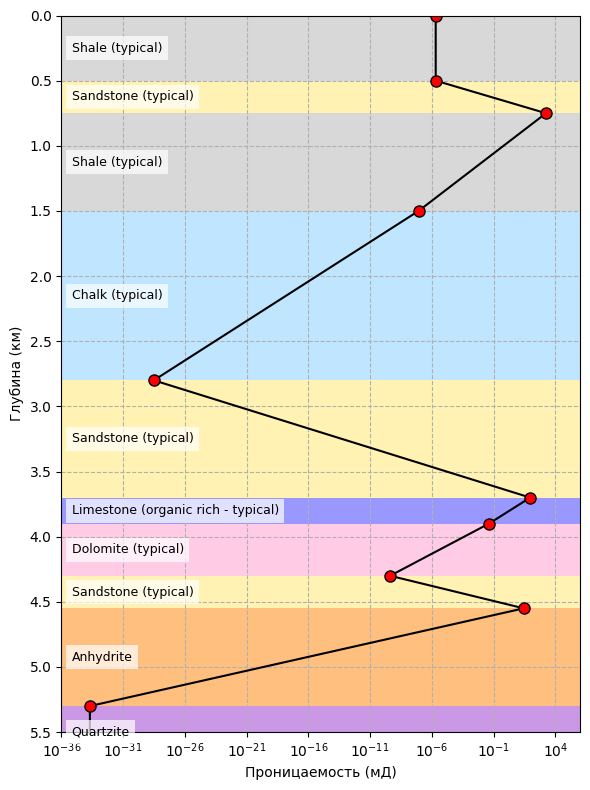

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize
import numpy as np

def plot_permeability_depth_profile(
    permeability_df,
    decompaction_corrected_df,
    ylim=None,
    yticks=None,
    xlim=None,
    xticks=None
):
    # Get data for age 0
    age_0_col = '0.0'
    permeability_age_0 = permeability_df[age_0_col].values
    depths = decompaction_corrected_df[age_0_col].values  # Depth values in km

    # Ensure the first depth starts at 0
    if depths[0] != 0:
        depths = np.insert(depths, 0, 0)
        permeability_age_0 = np.insert(permeability_age_0, 0, permeability_age_0[0])

    # Geological layers data
    geological_layer_names = [
        'Shale (typical)',
        'Sandstone (typical)',
        'Shale (typical)',
        'Chalk (typical)',
        'Sandstone (typical)',
        'Limestone (organic rich - typical)',
        'Dolomite (typical)',
        'Sandstone (typical)',
        'Anhydrite',
        'Quartzite'
    ]

    # Create figure
    fig, ax = plt.subplots(1, 1, figsize=(6, 8))

    # Define colors
    lithology_colors = {
        'Shale (typical)': (0.7, 0.7, 0.7, 0.5),
        'Sandstone (typical)': (1.0, 0.9, 0.4, 0.5),
        'Chalk (typical)': (0.5, 0.8, 1.0, 0.5),
        'Limestone (organic rich - typical)': (0.2, 0.2, 1.0, 0.5),
        'Dolomite (typical)': (1.0, 0.6, 0.8, 0.5),
        'Anhydrite': (1.0, 0.5, 0.0, 0.5),
        'Quartzite': (0.6, 0.2, 0.8, 0.5)
    }

    # Add geological background starting from 0 depth
    for i in range(len(depths)-1):
        layer_name = geological_layer_names[i % len(geological_layer_names)]
        depth = depths[i]
        next_depth = depths[i+1]

        ax.axhspan(depth, next_depth,
                  facecolor=lithology_colors[layer_name],
                  edgecolor='none')

        # Add layer name in the middle of each band
        midpoint = (depth + next_depth) / 2
        ax.text(0.02, midpoint, layer_name,
                va='center', ha='left', fontsize=9, color='black',
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'),
                transform=ax.get_yaxis_transform())

    # Plot permeability data
    ax.plot(permeability_age_0, depths, 'ko-',
            markersize=8, linewidth=1.5,
            markerfacecolor='red', markeredgecolor='black')

    # Formatting
    ax.set_xscale('log')
    ax.set_xlabel('Проницаемость (мД)')
    ax.set_ylabel('Глубина (км)')
    ax.grid(True, which="both", ls="--")
    ax.invert_yaxis()

    # Set axis limits and ticks
    if ylim is not None:
        ax.set_ylim(ylim)
    else:
        ax.set_ylim((max(depths), 0))  # Auto scale with 0 at top

    if yticks is not None:
        ax.set_yticks(yticks)

    if xlim is not None:
        ax.set_xlim(xlim)

    if xticks is not None:
        ax.set_xticks(xticks)
        ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())

    plt.tight_layout()
    plt.savefig('Permeability0_vs_Depth.tiff', format='tiff', dpi=300, bbox_inches='tight')
    plt.show()

# Usage example:
plot_permeability_depth_profile(
    permeability_df,
    decompaction_corrected_df,
    ylim=(5, 0),  # From 5 km to surface (0 km)
    yticks=np.arange(0, 6.0, 0.5),  # Ticks every 0.5 km
    xlim=(1e-36, 1e6),  # Permeability range
    # xticks=np.logspace(-36, 6, num=9)  # 9 logarithmic ticks from 1e-36 to 1e6
)

## Hydro & Lithostatic Pressures

In [ ]:
import numpy as np
import pandas as pd
from scipy.integrate import quad

# Initialize pressure DataFrames
hydrostatic_pressure_df = pd.DataFrame()
lithostatic_pressure_df = pd.DataFrame()

# Constants
g = 9.81  # gravitational acceleration in m/s^2
rho_sea = 1100  # density of sea water in kg/m^3
rho_w = 1040  # density of pore water in kg/m^3
RoWater = 1000  # density of fresh water in kg/m^3
RoMantle = 3300  # density of mantle material in kg/m^3

sediment_surfaces = []


def hydrostatic_pressures(depths, sea_level, sediment_surface, water_depth, rho_water=rho_w):
    """Calculate hydrostatic pressures accounting for sea level and sediment surface"""
    pressures = []
    for depth in depths:
        if sediment_surface >= sea_level:
            # Water column exists
            water_pressure = rho_sea * g * water_depth
            # Sediment pore water pressure
            if depth > sediment_surface:
                sediment_pressure = quad(lambda z: rho_water * g, sediment_surface, depth)[0]
            else:
                sediment_pressure = 0
        else:
            # No water column (sediment surface above sea level)
            water_pressure = 0
            sediment_pressure = quad(lambda z: rho_water * g, sea_level, depth)[0]

        total_pressure = (water_pressure + sediment_pressure) / 1e6  # Convert to MPa
        pressures.append(total_pressure)
    return pressures

def lithostatic_pressures(depths, rock_densities, porosities, sea_level, water_depth, sediment_surface):
    """Calculate lithostatic pressures accounting for sea level and sediment surface"""
    pressures = []
    total_pressure = 0

    # Water column pressure if exists
    if sediment_surface >= sea_level:
        total_pressure += rho_sea * g * water_depth

    for i, (depth, density, porosity) in enumerate(zip(depths, rock_densities, porosities)):
        if i == 0:
            # First layer starts at sediment surface or sea level
            start_depth = max(sediment_surface, sea_level)
        else:
            start_depth = depths[i-1]

        effective_density = density * (1 - porosity) + rho_w * porosity
        pressure_increment = quad(lambda z: effective_density * g, start_depth, depth)[0]
        total_pressure += pressure_increment

        pressures.append(total_pressure / 1e6)  # Convert to MPa

    return pressures

# Prepare age list
age_list = list(work_layers['Age (Ma)'].unique())

for i, age in enumerate(age_list):
    print(f'\nProcessing age {i}: {age} Ma')

    # Make a copy of work layers for this iteration
    work_layers_copy = work_layers[:10].copy()

    # Initialize lists for this age
    hydrostatic_p_list = []
    lithostatic_p_list = []
    depth_list = []
    density_list = []
    porosity_list = []
    y2_d_list = []
    y2_d_corrected_list = []

    # Process each layer
    for row_index, row in work_layers_copy.iloc[i:].iterrows():
        try:
            lithology = row['Lithology_type']
            layers_name = row['Event_name']

            # Get lithology parameters
            lith_mask = (work_layers_copy['Lithology_type'] == str(lithology))
            PWD = work_layers_copy.loc[lith_mask, 'Paleobathymetry, Ma'].iloc[0]/1000 if lith_mask.any() else 0
            eustatic = work_layers_copy.loc[lith_mask, 'Sea level, m'].iloc[0]/1000 if lith_mask.any() else 0

            # Get lithology properties
            lithology_match = Database_Lithotypes[Database_Lithotypes['Lithology type'] == str(lithology)]
            phi0 = lithology_match['Initial porosity'].iloc[0]/100
            c = lithology_match['Athy factor k (depth)'].iloc[0]
            c = 1e-10 if c == 0 else c
            RoGrain = lithology_match['Density'].iloc[0]

            y1 = row['Depth top, m']
            y2 = row['Depth bottom, m']

            # Decompaction calculations
            if row_index == i:  # First layer
                y1_d = 0
                if age != 0:
                    y1_d_corrected = corrected(y1_d, RoMantle, RoWater, PWD, eustatic)
            else:
                y1_d = y2_d_list[-1]
                y1_d_corrected = y2_d_corrected_list[-1] if y2_d_corrected_list else 0

            # Core calculations
            if age == 0:
                age_mask = (work_layers_copy['Age (Ma)'] == int(age))
                PWD = work_layers_copy.loc[age_mask, 'Paleobathymetry, Ma'].iloc[0]/1000 if age_mask.any() else 0
                y2_d = y2 + PWD
                y2_d_corrected = y2_d
            elif age == 260:
                depth = 0.3
                y2_d_corrected = abs(np.round(corrected(depth, RoMantle, RoWater, PWD, eustatic), 3))
                y2_d = y2_d_corrected
            else:
                y2_d = decomp_func(y1, y2, y1_d, phi0, c)
                y2_d_corrected = corrected(y2_d, RoMantle, RoWater, PWD, eustatic)

            # Store decompacted depths
            y2_d_list.append(y2_d)
            y2_d_corrected_list.append(y2_d_corrected)

            # Calculate porosity and density
            thickness = y2_d - y1_d
            porosity = porosity_func(phi0, c, y1_d, y2_d, thickness)
            density = bulk_density(porosity, RoGrain, RoWater)

            # Store properties for pressure calculations
            depth_list.append(y2_d * 1000)
            density_list.append(density)
            porosity_list.append(porosity)

        except Exception as ex:
            print(f"Error processing row {row_index} (Lithology: {lithology}): {str(ex)}")
            continue

    # Calculate pressures for this age
    if depth_list and density_list:
        # Determine sea level and sediment surface conditions
        SEA_LEVEL = 0
        SEDIMENT_SURFACE = work_layers_copy.iloc[i]['Paleobathymetry, Ma'] if i < len(work_layers_copy) else 0
        sediment_surfaces.append(SEDIMENT_SURFACE)

        if SEDIMENT_SURFACE >= 0:
            WATER_DEPTH = SEDIMENT_SURFACE
        else:
            WATER_DEPTH = SEA_LEVEL

        # Calculate both pressure types
        pressures_hydrostatic = hydrostatic_pressures(
            depth_list,
            sea_level=SEA_LEVEL,
            sediment_surface=SEDIMENT_SURFACE,
            water_depth=WATER_DEPTH
        )

        lith_pressures = lithostatic_pressures(
            depth_list,
            density_list,
            porosity_list,
            sea_level=SEA_LEVEL,
            water_depth=WATER_DEPTH,
            sediment_surface=SEDIMENT_SURFACE
        )

        hydrostatic_p_list = pressures_hydrostatic
        lithostatic_p_list = lith_pressures

        print(f"Age {age} Ma - Hydrostatic pressures (MPa):", pressures_hydrostatic)
        print(f"Age {age} Ma - Lithostatic pressures (MPa):", lith_pressures)

    # Store results in the DataFrames
    new_col_name = f'{age}'

    # Hydrostatic pressure
    resized_list = np.zeros(work_layers_copy.shape[0])
    resized_list[len(resized_list) - len(hydrostatic_p_list):] = hydrostatic_p_list
    hydrostatic_pressure_df[new_col_name] = resized_list

    # Lithostatic pressure
    resized_list = np.zeros(work_layers_copy.shape[0])
    resized_list[len(resized_list) - len(lithostatic_p_list):] = lithostatic_p_list
    lithostatic_pressure_df[new_col_name] = resized_list

# Final DataFrames available:
# hydrostatic_pressure_df - contains hydrostatic pressure values for each age
# lithostatic_pressure_df - contains lithostatic pressure values for each age


Processing age 0: 0.0 Ma
Age 0.0 Ma - Hydrostatic pressures (MPa): [np.float64(5.27778), np.float64(7.828379999999999), np.float64(15.480179999999999), np.float64(28.743299999999998), np.float64(37.92545999999999), np.float64(39.96593999999999), np.float64(44.046899999999994), np.float64(46.59749999999999), np.float64(54.24929999999999), np.float64(58.33025999999999)]
Age 0.0 Ma - Lithostatic pressures (MPa): [np.float64(5.852630780665549), np.float64(10.187653661318429), np.float64(24.11834382691704), np.float64(54.01270849524544), np.float64(73.86165382649389), np.float64(78.6755833497624), np.float64(88.675191659106), np.float64(94.5242059693622), np.float64(116.09048787336033), np.float64(126.36181292288313)]

Processing age 1: 45.0 Ma
Age 45.0 Ma - Hydrostatic pressures (MPa): [np.float64(3.507075), np.float64(11.157553763349476), np.float64(24.661908714666364), np.float64(33.900798391815215), np.float64(35.95068114046358), np.float64(40.04491470377063), np.float64(42.60519074554

<ipython-input-113-4be0c0745e12>:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('jet')


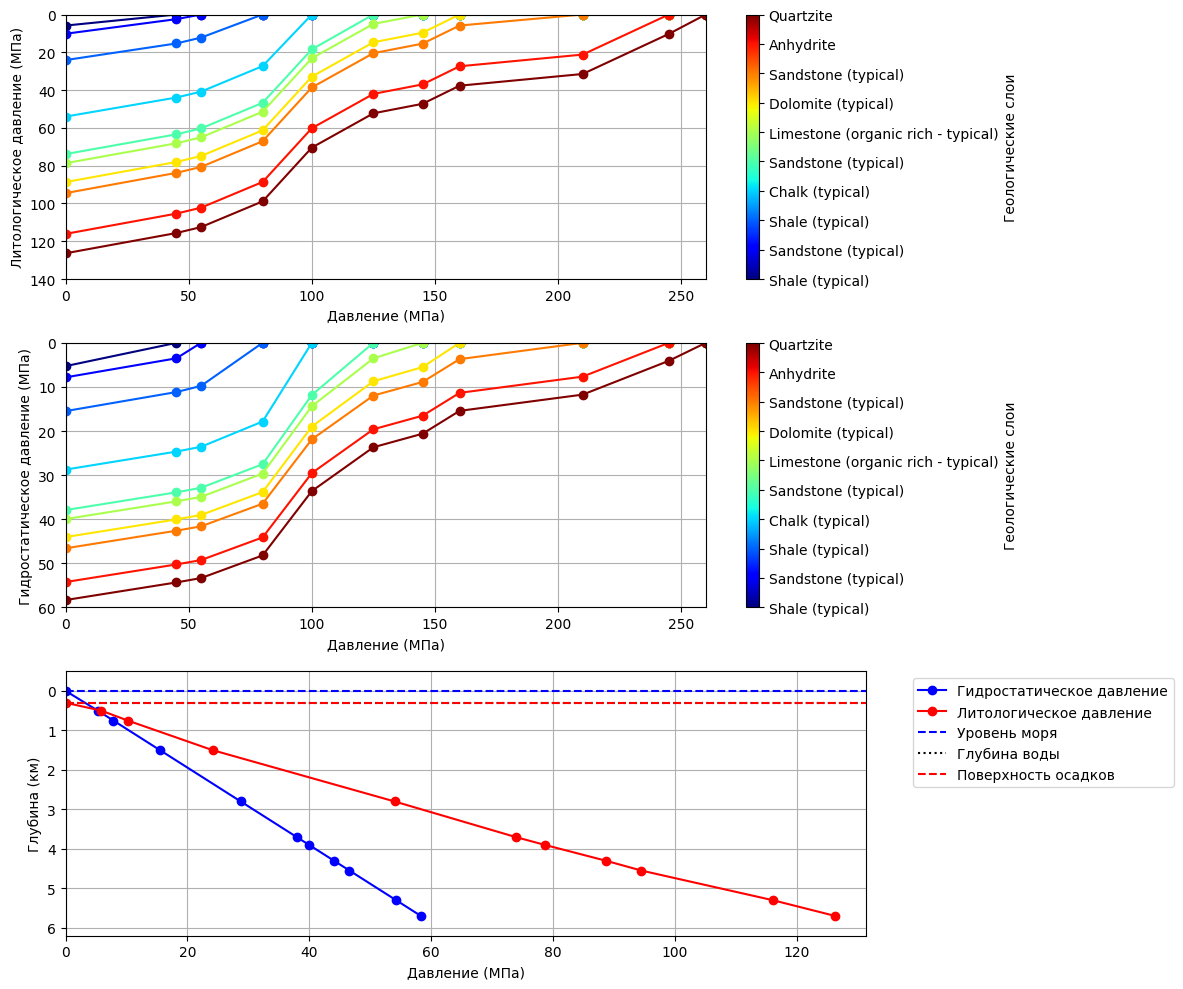

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize
import numpy as np

def plot_pressure_profiles(lithostatic_pressure_df, hydrostatic_pressure_df, decompaction_corrected_df, sediment_surfaces):
    # ages = lithostatic_pressure_df.columns.values
    ages = lithostatic_pressure_df.columns.astype(float).values

    # Данные геологических слоёв
    geological_layer_names = [
        'Shale (typical)',
        'Sandstone (typical)',
        'Shale (typical)',
        'Chalk (typical)',
        'Sandstone (typical)',
        'Limestone (organic rich - typical)',
        'Dolomite (typical)',
        'Sandstone (typical)',
        'Anhydrite',
        'Quartzite'
    ]

    # Создаем фигуру с 3 подграфиками
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10), sharex=False)

    # --- График 1: Литологическое давление в зависимости от возраста ---
    colormap = cm.get_cmap('jet')
    norm_lith = Normalize(vmin=0, vmax=len(lithostatic_pressure_df)-1)

    # Рисуем слои с цветовой картой
    for idx, (index, row) in enumerate(lithostatic_pressure_df.iterrows()):
        color = colormap(norm_lith(idx))
        ax1.plot(ages, row, color=color, lw=1.5, marker='o', markersize=6, label=f'Слой {index}')

    ax1.set_ylabel('Литологическое давление (МПа)')
    ax1.set_xlabel('Давление (МПа)')
    # ax1.set_title('Эволюция литологического давления')
    ax1.invert_yaxis()
    ax1.grid(True)
    ax1.set_xlim(0, 260)
    ax1.set_ylim(140, 0)
    # ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    # Добавляем цветовую шкалу с названиями слоёв
    sm_lith = cm.ScalarMappable(cmap=colormap, norm=norm_lith)
    sm_lith.set_array([])
    cbar_lith = plt.colorbar(
        sm_lith,
        ax=ax1,
        ticks=np.arange(len(geological_layer_names)),  # Позиции меток
    )
    cbar_lith.set_ticklabels(geological_layer_names)  # Подписи вместо чисел
    cbar_lith.set_label("Геологические слои")

    # --- График 2: Гидростатическое давление в зависимости от возраста ---
    norm_hydro = Normalize(vmin=0, vmax=len(hydrostatic_pressure_df)-1)

    for idx, (index, row) in enumerate(hydrostatic_pressure_df.iterrows()):
        color = colormap(norm_hydro(idx))
        ax2.plot(ages, row, color=color, lw=1.5, marker='o', markersize=6, label=f'Слой {index}')


    ax2.set_ylabel('Гидростатическое давление (МПа)')
    ax2.set_xlabel('Давление (МПа)')
    # ax2.set_title('Эволюция гидростатического давления')
    ax2.invert_yaxis()
    ax2.set_xlim(0, 260)
    ax2.set_ylim(60, 0)
    ax2.grid(True)

    # Добавляем цветовую шкалу с названиями слоёв
    sm_hydro = cm.ScalarMappable(cmap=colormap, norm=norm_hydro)
    sm_hydro.set_array([])
    cbar_hydro = plt.colorbar(
        sm_hydro,
        ax=ax2,
        ticks=np.arange(len(geological_layer_names)),
    )
    cbar_hydro.set_ticklabels(geological_layer_names)
    cbar_hydro.set_label("Геологические слои")

    # --- График 3: Профиль давления по глубине для возраста 0 млн. лет ---
    age_0_col = '0.0'
    age_0_lithostatic = lithostatic_pressure_df[age_0_col].values
    age_0_hydrostatic = hydrostatic_pressure_df[age_0_col].values
    age_0_depths = decompaction_corrected_df[age_0_col].values
    depths_km = age_0_depths
    SEA_LEVEL = 0
    SEDIMENT_SURFACE = sediment_surfaces[0] / 1000
    WATER_DEPTH = SEDIMENT_SURFACE if SEDIMENT_SURFACE >= 0 else SEA_LEVEL

    # График гидростатического давления
    hydro_depths = np.concatenate([[SEA_LEVEL], depths_km[depths_km >= SEA_LEVEL]])
    hydro_pressures = np.concatenate([[0], age_0_hydrostatic[depths_km >= SEA_LEVEL]])
    ax3.plot(hydro_pressures, hydro_depths, 'b-', marker='o', label='Гидростатическое давление')

    # График литологического давления
    if SEDIMENT_SURFACE < 0:
        litho_depths = np.concatenate([[SEDIMENT_SURFACE], depths_km[depths_km >= SEDIMENT_SURFACE]])
        litho_pressures = np.concatenate([[0], age_0_lithostatic[depths_km >= SEDIMENT_SURFACE]])
    else:
        litho_depths = np.concatenate([[SEDIMENT_SURFACE], depths_km[depths_km > SEDIMENT_SURFACE]])
        litho_pressures = np.concatenate([[0], age_0_lithostatic[depths_km > SEDIMENT_SURFACE]])
    ax3.plot(litho_pressures, litho_depths, 'r-', marker='o', label='Литологическое давление')

    # Опорные линии и оформление
    x_min = min(np.min(hydro_pressures), np.min(litho_pressures))
    x_max = max(np.max(hydro_pressures), np.max(litho_pressures))
    ax3.axhline(y=SEA_LEVEL, color='blue', linestyle='--', label='Уровень моря')
    if SEDIMENT_SURFACE > SEA_LEVEL:
        ax3.axhline(y=WATER_DEPTH, color='black', linestyle=':', label='Глубина воды')
    ax3.axhline(y=SEDIMENT_SURFACE, color='red', linestyle='--', label='Поверхность осадков')
    # ax3.set_title('Профиль давления по глубине на 0 млн. лет')
    ax3.set_xlabel('Давление (МПа)')
    ax3.set_ylabel('Глубина (км)')
    ax3.invert_yaxis()
    ax3.set_ylim(max(depths_km.max(), abs(SEDIMENT_SURFACE)) + 0.5,
                min(-0.5, SEDIMENT_SURFACE - 0.5))
    ax3.set_xlim(0, x_max + 5)
    ax3.grid(True)
    ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.savefig('Hydro&Lith_Pressures.tiff', format='tiff', dpi=300, bbox_inches='tight')
    plt.show()

# Использование:
plot_pressure_profiles(lithostatic_pressure_df, hydrostatic_pressure_df, decompaction_corrected_df, sediment_surfaces)

In [ ]:
decompaction_df.loc['Stratigraphic thickness (km)', :] = decompaction_df.sum(axis=0) # <-- ввод общей мощности

### добавление колонок Lithology_typeб	Event_name
work_layers.reset_index(drop=True, inplace=True)
decompaction_df['Event_name'] = work_layers['Event_name']
decompaction_df['Lithology_type'] = work_layers['Lithology_type']
decompaction_df = decompaction_df[decompaction_df.columns[::-1]]

decompaction_df.to_csv('/content/Decompaction.csv', index=True)

### Save to .csv

In [ ]:
### добавление колонок Lithology_type,	Event_name
# work_layers.reset_index(drop=True, inplace=True)
decompaction_corrected_df['Event_name'] = work_layers['Event_name']
decompaction_corrected_df['Lithology_type'] = work_layers['Lithology_type']
decompaction_corrected_df = decompaction_corrected_df[decompaction_corrected_df.columns[::-1]]

decompaction_corrected_df.to_csv('/content/Decompaction_corrected.csv', index=True)

In [ ]:
decompaction_corrected_df

,Lithology_type,Event_name,260.0,245.0,210.0,160.0,145.0,125.0,100.0,80.0,55.0,45.0,0.0
0,Shale (typical),Layer 10_1,0.0,0.0,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.50
1,Sandstone (typical),Layer 9_1,0.0,0.0,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.527,0.75
2,Shale (typical),Layer 8_1,0.0,0.0,0.00,0.000,0.000,0.000,0.000,0.000,1.237,1.375,1.50
3,Chalk (typical),Layer 7_1,0.0,0.0,0.00,0.000,0.000,0.000,0.000,1.889,2.447,2.555,2.80
4,Sandstone (typical),Layer 6_1,0.0,0.0,0.00,0.000,0.000,0.000,1.415,2.948,3.470,3.572,3.70
5,Limestone (organic rich - typical),Layer 5_1,0.0,0.0,0.00,0.000,0.000,0.264,1.316,2.809,3.324,3.425,3.90
6,Dolomite (typical),Layer 4_1,0.0,0.0,0.00,0.000,0.615,0.931,1.926,3.378,3.884,3.984,4.30
7,Sandstone (typical),Layer 3_1,0.0,0.0,0.00,0.629,1.136,1.438,2.401,3.826,4.326,4.425,4.55
8,Anhydrite,Layer 2_1,0.0,0.0,0.77,1.132,1.638,1.940,2.903,4.328,4.829,4.927,5.30
9,Quartzite,Layer 1_1,0.0,0.4,1.15,1.512,2.018,2.320,3.283,4.708,5.209,5.307,5.70


In [ ]:
### добавление колонок Lithology_type,	Event_name
# work_layers.reset_index(drop=True, inplace=True)
decompaction_corrected_df['Event_name'] = work_layers['Event_name']
decompaction_corrected_df['Lithology_type'] = work_layers['Lithology_type']
decompaction_corrected_df = decompaction_corrected_df[decompaction_corrected_df.columns[::-1]]

decompaction_corrected_df.to_csv('/content/Decompaction_corrected.csv', index=True)

In [ ]:
### добавление колонок Lithology_type,	Event_name
work_layers.reset_index(drop=True, inplace=True)
porosity_df['Event_name'] = work_layers['Event_name']
porosity_df['Lithology_type'] = work_layers['Lithology_type']
porosity_df = porosity_df[porosity_df.columns[::-1]]

porosity_df.to_csv('/content/Porosity.csv', index=True)

In [ ]:
### добавление колонок Lithology_type,	Event_name
work_layers.reset_index(drop=True, inplace=True)
density_df['Event_name'] = work_layers['Event_name']
density_df['Lithology_type'] = work_layers['Lithology_type']
density_df = density_df[density_df.columns[::-1]]

density_df.to_csv('/content/Density.csv', index=True)

In [ ]:
### добавление колонок Lithology_type,	Event_name
work_layers.reset_index(drop=True, inplace=True)
density_column_df['Event_name'] = work_layers['Event_name']
density_column_df['Lithology_type'] = work_layers['Lithology_type']
density_column_df = density_column_df[density_column_df.columns[::-1]]

density_column_df.to_csv('/content/Density_column.csv', index=True)

In [ ]:
### добавление колонок Lithology_type,	Event_name
work_layers.reset_index(drop=True, inplace=True)
permeability_df['Event_name'] = work_layers['Event_name']
permeability_df['Lithology_type'] = work_layers['Lithology_type']
permeability_df = permeability_df[permeability_df.columns[::-1]]

permeability_df.to_csv('/content/Permeability.csv', index=True)